In [95]:
import numpy as np
import pyswarms

X_filtered = np.linspace(0, 5, 1000)
y_filtered = np.log(np.log(50+X_filtered))

import logging

In [96]:
y_filtered

array([1.36405463, 1.36408022, 1.3641058 , 1.36413138, 1.36415696,
       1.36418253, 1.3642081 , 1.36423367, 1.36425923, 1.36428479,
       1.36431035, 1.3643359 , 1.36436146, 1.364387  , 1.36441255,
       1.36443809, 1.36446363, 1.36448916, 1.36451469, 1.36454022,
       1.36456575, 1.36459127, 1.36461679, 1.3646423 , 1.36466782,
       1.36469333, 1.36471883, 1.36474433, 1.36476983, 1.36479533,
       1.36482082, 1.36484631, 1.3648718 , 1.36489728, 1.36492276,
       1.36494824, 1.36497372, 1.36499919, 1.36502465, 1.36505012,
       1.36507558, 1.36510104, 1.36512649, 1.36515195, 1.36517739,
       1.36520284, 1.36522828, 1.36525372, 1.36527916, 1.36530459,
       1.36533002, 1.36535545, 1.36538087, 1.36540629, 1.3654317 ,
       1.36545712, 1.36548253, 1.36550794, 1.36553334, 1.36555874,
       1.36558414, 1.36560953, 1.36563493, 1.36566031, 1.3656857 ,
       1.36571108, 1.36573646, 1.36576183, 1.36578721, 1.36581258,
       1.36583794, 1.36586331, 1.36588867, 1.36591402, 1.36593

In [99]:
def func(x, a):
    return np.log(np.log((a+x)))
    # return x+2

# TO REMOVE

# Set-up hyperparameters
options = {'c1': 0.5, 'c2': 0.3, 'w':0.9}
n_particles = 30
iterations = 300

n_params=1

# Creating a string that later will be converted to a function call
fcall_string = "func(X"
for i in range(n_params):
    fcall_string += f", params[{i}]"
fcall_string += ")"



def cost_function(params, X, y):
    y_pred = eval(fcall_string)
    if np.isnan(y_pred).any():
        # Equivalent to return np.inf except pyswarm can handle np.inf
        return 1e10
    return np.mean((y - y_pred)**2, axis=0)            

# We need to return a MSE value for each particle. That's why we need to call the cost function for each particle (param combination)
def cost_function_wrapper(params):
    arr = np.array([cost_function(p, X_filtered, y_filtered) for p in params])
    # print(arr)
    
    return arr

# Call instance of PSO
optimizer = pyswarms.single.GlobalBestPSO(n_particles=n_particles, dimensions=n_params, options=options)

# Perform optimization
_, pos = optimizer.optimize(cost_function_wrapper, iters=iterations, verbose=False)  
pos

C:\Users\lreis\AppData\Local\Temp\ipykernel_10976\3532491936.py:2: RuntimeWarning: invalid value encountered in log
  return np.log(np.log((a+x)))


array([49.99999998])

In [30]:
from CSOWP_SR import *
from ExpressionTree import *
import os
os.environ["PATH"] += os.pathsep + 'D:/Program Files (x86)/Graphviz-10.0.1-win64/bin/'

trees = []
for i in range(3):

    with open(f"Outputs/cluster/DF/F1/trees/tree-2000-6-{i}", "rb") as file:
        trees.append(pickle.load(file))

SR = SymbolicRegression(3, custom_functions_dict={"cube": ["(", ")**3"]})
SR.fit(np.c_[[1, 2]], np.array([2, 3]), feature_names=["x"])

functions = SR._functions.copy()
functions.append("cube")

for tree in trees:
    display(tree.visualize_tree())
    print(tree.toString_smp(SR._operators, functions, SR.custom_functions_dict))
    display(tree.toSmpExpr(SR._operators, functions, SR.custom_functions_dict))

KeyboardInterrupt: 

In [6]:
a = np.array([np.nan, np.nan])
print(a)

[nan nan]


In [4]:
np.nan in a

True

In [25]:
type([np.nan]) is lista

True

In [23]:
np.nan in np.nan

TypeError: argument of type 'float' is not iterable

In [17]:
from scipy.optimize import curve_fit
import numpy as np

X = np.linspace(0, 5, 1000)
y = 2*X**2

def func(X, a):
    return a*np.exp(np.sin(X*np.exp(a)*np.exp(X - 3 + np.cos(X**2))))



params, _ = curve_fit(func, X, y, method="trf")
params

array([1.05252405])

In [11]:
if type(params) is list or type(params) is np.ndarray:
    print("é")

é


In [53]:
import numpy as np
import pyswarms as ps

# Define the objective function
def objective_function(params, X, y):
    a, b = params[0], params[1]
    predictions = a * X + b
    mse = np.mean((y - predictions)**2)
    return mse

# Sample data
X = np.array([1, 2, 3, 4, 5])
y = np.array([3, 5, 7, 9, 11])

# PSO requires the objective function to return an array-like output
def wrapped_objective_function(params):
    arr = np.array([objective_function(p, X, y) for p in params])
    # print(arr.shape)
    return arr

# Set bounds for the parameters 'a' and 'b'
bounds = ([-10, -10], [10, 10])

# Initialize the optimizer
optimizer = ps.single.GlobalBestPSO(n_particles=50, dimensions=2, options={'c1': 0.5, 'c2': 0.3, 'w': 0.9}, bounds=bounds)

# Optimize
cost, best_params = optimizer.optimize(wrapped_objective_function, iters=100, verbose=False)

# Output the results
best_a, best_b = best_params
print(f"Best value of a: {best_a}")
print(f"Best value of b: {best_b}")
print(f"Minimum MSE: {cost}")


(50,)
(50,)
(50,)
(50,)
(50,)
(50,)
(50,)
(50,)
(50,)
(50,)
(50,)
(50,)
(50,)
(50,)
(50,)
(50,)
(50,)
(50,)
(50,)
(50,)
(50,)
(50,)
(50,)
(50,)
(50,)
(50,)
(50,)
(50,)
(50,)
(50,)
(50,)
(50,)
(50,)
(50,)
(50,)
(50,)
(50,)
(50,)
(50,)
(50,)
(50,)
(50,)
(50,)
(50,)
(50,)
(50,)
(50,)
(50,)
(50,)
(50,)
(50,)
(50,)
(50,)
(50,)
(50,)
(50,)
(50,)
(50,)
(50,)
(50,)
(50,)
(50,)
(50,)
(50,)
(50,)
(50,)
(50,)
(50,)
(50,)
(50,)
(50,)
(50,)
(50,)
(50,)
(50,)
(50,)
(50,)
(50,)
(50,)
(50,)
(50,)
(50,)
(50,)
(50,)
(50,)
(50,)
(50,)
(50,)
(50,)
(50,)
(50,)
(50,)
(50,)
(50,)
(50,)
(50,)
(50,)
(50,)
(50,)
(50,)
Best value of a: 1.9999333158554038
Best value of b: 1.0002008680045702
Minimum MSE: 8.894215436743857e-09


In [48]:
import numpy as np
import pyswarms as ps

# Define the objective function
def objective_function(params, X, y):
    a, b = params[0], params[1]
    predictions = a * X + b
    mse = np.mean((y - predictions)**2)
    return mse

# Sample data
X = np.array([1, 2, 3, 4, 5])
y = np.array([2, 4, 6, 8, 10])

# Set bounds for the parameter 'a'
bounds = ([-10], [10])

# Initialize the optimizer
optimizer = ps.single.GlobalBestPSO(n_particles=50, dimensions=2, options={'c1': 0.5, 'c2': 0.3, 'w': 0.9})

# Optimize
cost, best_a = optimizer.optimize(objective_function, iters=100, X=X, y=y, verbose=False)

# Output the results
print(f"Best value of params: {best_a}")
print(f"Minimum MSE: {cost}")


ValueError: operands could not be broadcast together with shapes (2,) (5,) 

In [64]:
import numpy as np
import pyswarms

X = np.linspace(-5, 5, 1000)
y = 2*X

X.shape, y.shape

((1000,), (1000,))

In [65]:


options = {'c1': 0.5, 'c2': 0.3, 'w':0.9}
n_particles = 30
iterations = 300

def funcs(X, a, b):
    return a*X + b

n_params = 2
if n_params <= 0:
    print("nada para otimizar")


# Creating a string that later will be converted to a function call
fcall_string = "func(X"

for i in range(n_params):
    fcall_string += f", params[{i}]"
fcall_string += f")"

print(fcall_string)

def cost_function(params, X, y):
    func = funcs
    
    y_pred = eval(fcall_string)
    return np.mean((y - y_pred)**2, axis=0)            

def wrapped_objective_function(params):
    arr = np.array([cost_function(p, X, y) for p in params])
    # print(arr.shape)
    return arr

# Call instance of PSO
optimizer = pyswarms.single.GlobalBestPSO(n_particles=n_particles, dimensions=n_params, options=options)


# Perform optimization
_, pos = optimizer.optimize(wrapped_objective_function, iters=iterations, verbose=False)  


pos

func(X, params[0], params[1])


array([2.0000000e+00, 1.0560264e-08])

In [11]:
import numpy as np

X = np.c_[[np.linspace(1, 2, 100)]]
# X[0, 10: 50] = np.nan
# X[0, 50: 99] = np.inf

valid_indices = ~np.isnan(1) & np.isfinite(1)
# print(valid_indices)
print(False in valid_indices)

# X[:, valid_indices.all(axis=0)]

if False in valid_indices:
    print("oi")
print(type(valid_indices))

TypeError: argument of type 'numpy.bool' is not iterable

In [7]:
from scipy.optimize import dual_annealing, differential_evolution
import numpy as np

X = np.linspace(0, 2)
y = 2*X

def exp(a):
    return np.exp(a)

def func(x, a, b):
    return ((a+(x*(exp(exp(-(exp(-x)*exp(-x))))+exp((exp(-x)+(x+((x*x)-b)))))))-x)

def cost_function(params):
    y_pred = func(X, *params)
    return np.mean((y - y_pred)**2)

n_params = 2
bounds = [(-5, 15) for _ in range(n_params)]

result = dual_annealing(cost_function, bounds)
params = result.x
params

array([0.4936762 , 8.11092724])

In [38]:
from scipy.optimize import dual_annealing, differential_evolution, curve_fit
import numpy as np

X = np.linspace(0.1, 10)
y = 3+2.13*np.log(X)

# valid_indices = ~np.isnan(y) & np.isfinite(y)
# y = y[valid_indices]
# X = X[:, valid_indices.all(axis=0)]

def func(X, a, b, c, d):
    return a*np.exp(-b*np.exp(-c*X + d))

def cost_function(params):
    y_pred = func(X, *params)
    return np.mean((y - y_pred)**2)

n_params = 1
bounds = [(-500, -2) for _ in range(n_params)]

params, _ = curve_fit(func, X, y, maxfev=100000)
params

C:\Users\lreis\AppData\Local\Temp\ipykernel_7640\1882324088.py:21: OptimizeWarning: Covariance of the parameters could not be estimated
  params, _ = curve_fit(func, X, y, maxfev=100000)


array([   5.80959252,  427.55265025,   -1.10056594, -427.02265419])

In [16]:
from scipy.optimize import curve_fit
import numpy as np

def model_func(x, a, b):
    return a * np.exp(b * x)

# Generate some data
X = np.linspace(0, 4, 50)
y = model_func(X, 2, -1) + 0.5 * np.random.normal(size=X.size)

# Pass an invalid initial guess that causes overflow or NaN
p0 = [np.inf, np.nan]
params, _ = curve_fit(model_func, X, y, p0=p0)
print("params:", params)  # May return NaN


params: [inf nan]


C:\Users\lreis\AppData\Local\Temp\ipykernel_20644\2607377293.py:13: OptimizeWarning: Covariance of the parameters could not be estimated
  params, _ = curve_fit(model_func, X, y, p0=p0)


In [17]:
X_filtered = np.array([1, 2, 3, 4, 5])
y_filtered = np.array([1, 4, np.nan, 16, 25])  # y_filtered contains NaN

def quadratic(x, a, b, c):
    return a * x**2 + b * x + c

params, _ = curve_fit(quadratic, X_filtered, y_filtered)
print(params)  # May return NaN


ValueError: array must not contain infs or NaNs

In [22]:
def overly_complex_model(x, a, b, c, d, e):
    return a * x**4 + b * x**3 + c * x**2 + d * x + e

# Sparse data that might not fit the complex model well
X_filtered = np.array([1, 2, 3, 4, 5])
y_filtered = np.array([1, 4, 9, 16, 25])

params, _ = curve_fit(overly_complex_model, X_filtered, y_filtered)
print(params)  # May return NaN


[-2.17803553e-12 -2.21822560e-12  1.00000000e+00 -2.53863597e-12
 -1.92596921e-12]


C:\Users\lreis\AppData\Local\Temp\ipykernel_20644\2286885891.py:8: OptimizeWarning: Covariance of the parameters could not be estimated
  params, _ = curve_fit(overly_complex_model, X_filtered, y_filtered)


In [24]:
def linear_func(x, a, b):
    return a * x + b

# Data with little variation, leading to a singular Jacobian
X_filtered = np.array([1, 2, 3])
y_filtered = np.array([2, 4, 6])

params, _ = curve_fit(linear_func, X_filtered, y_filtered)
print(params)  # May return NaN


[ 2.00000000e+00 -2.18060186e-12]


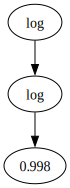

['log', 'log', '0.998']


<string>:1: RuntimeWarning: invalid value encountered in log


np.float64(nan)

In [18]:
from CSOWP_SR import *
from ExpressionTree import *
import os
os.environ["PATH"] += os.pathsep + 'D:/Program Files (x86)/Graphviz-10.0.1-win64/bin/'

tree = ExpressionTree()
p = tree.add_root("log")
p1 = tree.add_left(p, "log")
tree.add_left(p1, "0.998")

display(tree.visualize_tree())
tree_list = [element.element() for element in tree.preorder()]
print(tree_list)

SR = SymbolicRegression(3)
X = np.linspace(-5, 5, 1000)
y = X
SR.fit(np.c_[X], y, feature_names=["x"])
func = SR.toFunc(tree)
func


output = SR.evaluate_tree(tree)
output

In [33]:
outputs = [output, output]
outputs

[np.float64(nan), np.float64(nan)]

In [35]:
~np.isnan(outputs) & np.isfinite(outputs)

array([False, False])

In [36]:
np.isfinite(output)

np.False_

In [34]:
np.isnan(outputs)

array([ True,  True])

In [31]:
if np.isnan(output):
    print("a")

a


In [10]:
~np.isfinite(np.inf)

np.True_

In [11]:
import numpy as np
X = np.linspace(0, 10, 1000)
y = 2*X

SR = SymbolicRegression(3)
SR.fit(np.c_[X],y, feature_names=["x"])

In [14]:
SR.evaluate_tree(tree)

NameError: name 'nan' is not defined

In [5]:
from trainSR import trainSR
from trainAlgorithm import *
from CSOWP_SR import *
from ExpressionTree import *
import numpy as np

func = "lambda x: 1.57 + 24.3*x"
 
# tree = ExpressionTree()
# p = tree.add_root("sqrt", "function")
# tree.add_left(p, "x", e_type="feature")
# tree.visualize_tree()

# SR = SymbolicRegression(3)
# SR.fit(np.c_[X], y, feature_names=["x"])
# print(SR.evaluate_tree(tree))

# for i in range(1000, 10000):
    # print(f"{i}th iteration ----------------------------")
TSR = trainSR(population=100, generations=3, dir_path="Outputs/tests/test_new_pso", x_range=(1, 5),
            n_points=1000, optimization_kind="LS", SEED=42, overwrite=True)
TSR.fit(file_name=["oi", "ola"], func=[func, func])
TSR.runParallel(max_processes=2);

In [6]:
import sympy as smp

display(smp.parse_expr("(sin(0.6158961174977085)*((x/0.32443192361742534)/sin(0.0719899074313825)))"))

smp.parse_expr("(((x+x)+x)/abs(0.12118426725650978))")

24.755688264852023*x

24.755688736805445*x

In [9]:
X = np.c_[np.linspace(1, 5, 1000)]
X1 = np.c_[X, X]
y = 0.001*X + 13

In [14]:
def func(x, c0, c1):
    return ((c0+(x*(np.exp(np.exp(-(np.exp(-x)*np.exp(-x))))+np.exp((np.exp(-x)+(x+((x*x)-c1)))))))-x)

def cost_function(params):
    y_pred = func(X, *params)
    return np.mean((y - y_pred)**2)
            
bounds = [(-10, 10) for _ in range(2)]

params = dual_annealing(cost_function, bounds)
params

 message: ['Maximum number of iteration reached']
 success: True
  status: 0
     fun: 7.0102934202570184e+16
       x: [-1.000e+01  1.000e+01]
     nit: 1000
    nfev: 4025
    njev: 8
    nhev: 0

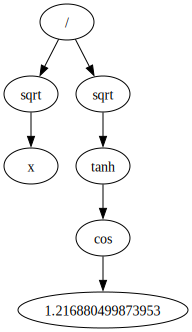

In [30]:
with open("Outputs/tests/test_new_pso/oi/trees/tree-50-3-0", "rb") as file:
    tree = pickle.load(file)

tree.visualize_tree()

(np.float64(-0.55), np.float64(11.55))


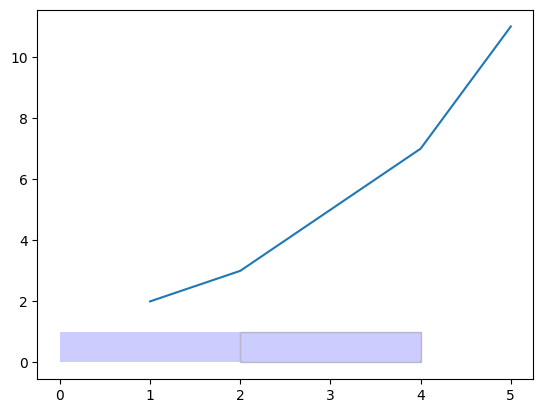

In [7]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# Create some data
x = [1, 2, 3, 4, 5]
y = [2, 3, 5, 7, 11]

# Create a plot

ax = plt.gca()
ax.plot(x, y)

# Add a rectangle with a background color
rect = patches.Rectangle((0, 0), 2, 1, linewidth=0, edgecolor='none', facecolor='blue', alpha=0.2)
ax.add_patch(rect)

rect = patches.Rectangle((2, 0), 2, 1, linewidth=1, edgecolor='black', facecolor='blue', alpha=0.2)
ax.add_patch(rect)

print(ax.get_ylim())

# Display the plot
plt.show()


In [17]:
import seaborn as sns
sns.color_palette("icefire", 4)

[(0.21977058, 0.52241482, 0.81457651),
 (0.1866769, 0.1811332, 0.29166583),
 (0.29202272, 0.14486161, 0.17852793),
 (0.82915955, 0.28696963, 0.21210766)]

In [1]:
from rollingWindow import *
import pickle

os.environ["PATH"] += os.pathsep + 'D:/Program Files (x86)/Graphviz-10.0.1-win64/bin/'

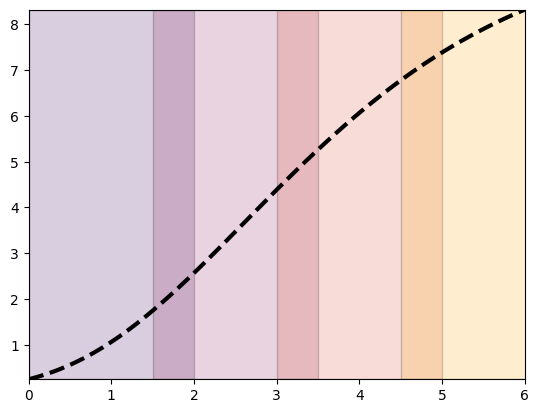

In [5]:
X = np.linspace(0, 6, 100)
y = 10*np.exp(-0.5*np.exp(-0.5*X+2))

roolWindow = rollingWindow(ignore_warning=True, return_func=True, dir_path="Outputs/rollingWindow/test2")

roolWindow.fit(X, y, nPics=4, L=2)
roolWindow.visualize()

In [3]:
roolWindow.nPics, roolWindow.L

(4, 2)

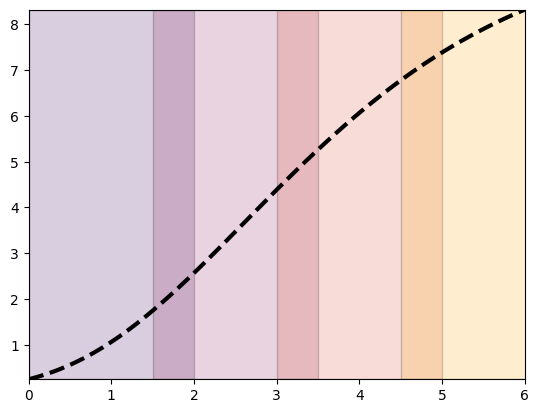

In [4]:
# roolWindow.visualize("inferno", 0.2, "black", 1)
roolWindow.visualize()

In [ ]:
roolWindow.run()

iniciou
iniciou
iniciou
iniciou
iniciou
iniciou


(([<ExpressionTree.ExpressionTree at 0x2a355aceb60>, np.float64(0.0)],
  [<ExpressionTree.ExpressionTree at 0x2a355ad7880>, np.float64(0.0)]),
 [<function CSOWP_SR.<lambda>(x)>, <function CSOWP_SR.<lambda>(x)>])

In [ ]:
a=3
eval(f"""
if {a>2}:
    print('oi')
else:
    print('opa', {a})
""")

In [3]:
D = {"a": 1, "b": 2}
for i in D.items():
    print(i)

('a', 1)
('b', 2)


In [1]:
from trainSR import trainSR
from trainAlgorithm import *
from CSOWP_SR import *
from ExpressionTree import *

In [2]:
def func(X):
    return np.sqrt(X)

X = np.linspace(-5, -1, 1000)
y = func(X)

C:\Users\lreis\AppData\Local\Temp\ipykernel_20996\1582281215.py:2: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(X)


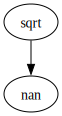

In [11]:
tree = ExpressionTree()
p = tree.add_root("sqrt", "function")
tree.add_left(p, np.nan, e_type="feature")
tree.visualize_tree()


In [13]:
SR = SymbolicRegression(3)
SR.fit(np.c_[X], y, feature_names=["x"])
func = SR.toFunc(tree)
func(5)

NameError: name 'nan' is not defined

In [20]:
import numpy as np
from scipy.optimize import curve_fit

# Define a function that has a high risk of producing NaN values
def problematic_func(x, a, b):
    return a / (x - b)  # Division by a small number when x is close to b

# Generate data that includes the problematic point
x_data = np.linspace(0, 10, 100)
y_data = 2 / (x_data - 5) + np.random.normal(0, 0.1, size=x_data.size)

# Introduce a problematic data point that will cause division by zero
x_data[50] = 5  # This causes division by zero
x_data = [5 for _ in x_data]

# Provide an initial guess that will likely lead to trouble
initial_guess = [1, 5]  # Close to where the division by zero occurs

# Attempt to fit the curve

popt, pcov = curve_fit(problematic_func, x_data, y_data, p0=initial_guess)
print("Optimized parameters:", popt)

Optimized parameters: [1. 5.]


C:\Users\lreis\AppData\Local\Temp\ipykernel_20996\4052629010.py:6: RuntimeWarning: divide by zero encountered in divide
  return a / (x - b)  # Division by a small number when x is close to b
C:\Users\lreis\AppData\Local\Temp\ipykernel_20996\4052629010.py:21: OptimizeWarning: Covariance of the parameters could not be estimated
  popt, pcov = curve_fit(problematic_func, x_data, y_data, p0=initial_guess)


In [5]:

SR.evaluate_tree(tree)

NameError: name 'nan' is not defined

In [18]:
TSR = trainSR("Outputs/tests", 20, 3, overwrite=True, n_points=1000, x_range=[-5, 5], optimization_kind="PSO_NEW", SEED=6)
# TSR.fit(1, 2, 3, 4)

In [19]:
TSR.testAlgorithm({"file_name": "test1", "func": lambda x: x+1})


-=-=-=-=-=-=-=-= Training for population 20 and generation 3 - tests\test1 =-=-=-=-=-=-=-=-
iniciou
iniciou
iniciou
-=-=-=-=-=-=-= Done training for population 20 and generation 3 - tests\test1 =-=-=-=-=-=-=-


(array([-5.        , -4.98998999, -4.97997998, -4.96996997, -4.95995996,
        -4.94994995, -4.93993994, -4.92992993, -4.91991992, -4.90990991,
        -4.8998999 , -4.88988989, -4.87987988, -4.86986987, -4.85985986,
        -4.84984985, -4.83983984, -4.82982983, -4.81981982, -4.80980981,
        -4.7997998 , -4.78978979, -4.77977978, -4.76976977, -4.75975976,
        -4.74974975, -4.73973974, -4.72972973, -4.71971972, -4.70970971,
        -4.6996997 , -4.68968969, -4.67967968, -4.66966967, -4.65965966,
        -4.64964965, -4.63963964, -4.62962963, -4.61961962, -4.60960961,
        -4.5995996 , -4.58958959, -4.57957958, -4.56956957, -4.55955956,
        -4.54954955, -4.53953954, -4.52952953, -4.51951952, -4.50950951,
        -4.4994995 , -4.48948949, -4.47947948, -4.46946947, -4.45945946,
        -4.44944945, -4.43943944, -4.42942943, -4.41941942, -4.40940941,
        -4.3993994 , -4.38938939, -4.37937938, -4.36936937, -4.35935936,
        -4.34934935, -4.33933934, -4.32932933, -4.3

In [6]:
tasks = [["test1", "test2", "test3"], [lambda x: 2*x+3, lambda x: x**2, lambda x: x**3]]
TSR.fit(tasks)
results = TSR.runParallel(max_processes=1)

for i in results:
    print(i[2])

['+', '-', '*', '/']
['+', '-', '*', '/']
['+', '-', '*', '/']


In [7]:
arr = np.linspace(1, 2, 1000)
arr.shape

(1000,)

In [9]:
zeros = np.zeros(arr.shape)
zeros.shape

(1000,)